In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
%matplotlib notebook

In [4]:
covid19 = pd.read_csv("C:/Users/Saanvi/Downloads/covid_19_india.csv")

In [5]:
#print(covid19)
covid19.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [6]:
covid19.shape

(3315, 9)

In [7]:
covid19.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [8]:
covid19.dropna(inplace=True)

In [9]:
covid19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3315 entries, 0 to 3314
Data columns (total 9 columns):
Sno                         3315 non-null int64
Date                        3315 non-null object
Time                        3315 non-null object
State/UnionTerritory        3315 non-null object
ConfirmedIndianNational     3315 non-null object
ConfirmedForeignNational    3315 non-null object
Cured                       3315 non-null int64
Deaths                      3315 non-null int64
Confirmed                   3315 non-null int64
dtypes: int64(4), object(5)
memory usage: 259.0+ KB


In [48]:
df=covid19.loc[(covid19['State/UnionTerritory']=='Delhi')]

In [49]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
34,35,02/03/20,6:00 PM,Delhi,1,0,0,0,1
38,39,03/03/20,6:00 PM,Delhi,1,0,0,0,1
42,43,04/03/20,6:00 PM,Delhi,1,0,0,0,1
45,46,05/03/20,6:00 PM,Delhi,2,0,0,0,2
51,52,06/03/20,6:00 PM,Delhi,3,0,0,0,3


In [50]:
df.shape

(113, 9)

<IPython.core.display.Javascript object>


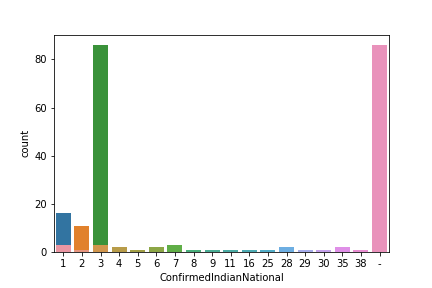

In [51]:
sns.countplot(x='ConfirmedForeignNational',data=df)

In [52]:
sns.countplot(x='ConfirmedIndianNational',data=df)

In [53]:
import plotly.offline as py
import plotly.graph_objs as go

In [54]:
cured_chart=go.Scatter(x=df['Date'],y=df['Cured'],name='Cured Rate')
deaths_chart=go.Scatter(x=df['Date'],y=df['Deaths'],name='Deaths Rate')
py.iplot([cured_chart,deaths_chart])

In [26]:
from sklearn.svm import LinearSVR

In [27]:
dfc=df[['Confirmed']]
dfc=dfc.values

In [28]:
#Train and Test
train_size=int(len(dfc)*0.80)
test_size=len(dfc)-train_size

In [29]:
train,test=dfc[0:train_size,:],dfc[train_size:len(dfc),:]

In [30]:
train.shape

(84, 1)

In [31]:
def create_dataset(dataset,look_back=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return np.array(dataX),np.array(dataY)

        

In [32]:
look_back=2
trainX,trainY=create_dataset(train,look_back=look_back)
testX,testY=create_dataset(test,look_back=look_back)

In [33]:
model=LinearSVR()

In [34]:
model.fit(trainX,trainY)

C:\Users\Saanvi\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [38]:
predict1=model.predict(testX)

In [40]:
plt.plot(testY,color='blue',label="Actual Values")
plt.plot(predict1,color='brown',label="Predicted Values")
plt.ylabel('meantemp')
plt.legend()